In [1]:
import pandas as pd, numpy as np, os
from get_draws.api import get_draws
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.2_remission_rate_changes/ciff_sam/2022_01_28_17_10_48/count_data/'

In [3]:
figname = 'model_5.3.2'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# maternal bmi

In [5]:
births = pd.read_csv(output_dir +'births.csv')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
1536,1536,female,2022,total_births,29,baseline,0.0,covered,bep,cat2
1537,1537,female,2022,total_births,29,baseline,0.0,uncovered,bep,cat2
1538,1538,female,2022,total_births,29,baseline,0.0,covered,mmn,cat2
1539,1539,female,2022,total_births,29,baseline,0.0,uncovered,mmn,cat2
1540,1540,female,2022,total_births,29,baseline,1397.0,covered,ifa,cat2


## check exposure

proportion of babies born to each maternal BMI category
- validation target is 0.224 (95% CI: 0.217, 0.231) for cat1

In [6]:
cols = ['input_draw','scenario','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario            maternal_malnutrition                              
baseline            cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   
lbwsg_interventions cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   
sqlns               cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   
wasting_treatment   cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   

                                                min      2.5%       50%  \
scenario            maternal_malnutrition                                 
baseline            cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   
lbwsg_interventions cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   
sqlns               cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   
wasting_treatment   cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   

                                              97.5%       max  
scenario            maternal_malnutrition                      
baseline            cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955  
lbwsg_interventions cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955  
sqlns               cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955  
wasting_treatment   cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955

In [7]:
# check it does not vary by sex
cols = ['input_draw','scenario','sex','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

# looks good

count      mean       std  \
scenario            sex    maternal_malnutrition                              
baseline            female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   
lbwsg_interventions female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   
sqlns               female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   
wasting_treatment   female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   

                                                       min      2.5%  \
scenario            sex    maternal_malnutrition                       
baseline            female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   
lbwsg_interventions female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   
sqlns               female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   
wasting_treatment   female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   

                                                       50%     97.5%       max  
scenario            sex    maternal_malnutrition                                
baseline            female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1                   0.223127  0.234086  0.236369  
                           cat2                   0.776873  0.781009  0.781107  
lbwsg_interventions female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1                   0.223127  0.234086  0.236369  
                           cat2                   0.776873  0.781009  0.781107  
sqlns               female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1                   0.223127  0.234086  0.236369  
                           cat2                   0.776873  0.781009  0.781107  
wasting_treatment   female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1   

In [8]:
# check it does not vary by year
cols = ['input_draw','scenario','year','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value'].head(12)

# looks good

count      mean       std  \
scenario            year maternal_malnutrition                              
baseline            2022 cat1                    12.0  0.224687  0.005866   
                         cat2                    12.0  0.775313  0.005866   
                    2023 cat1                    12.0  0.224510  0.005588   
                         cat2                    12.0  0.775490  0.005588   
                    2024 cat1                    12.0  0.225181  0.005346   
                         cat2                    12.0  0.774819  0.005346   
                    2025 cat1                    12.0  0.224626  0.005162   
                         cat2                    12.0  0.775374  0.005162   
                    2026 cat1                    12.0  0.224076  0.005594   
                         cat2                    12.0  0.775924  0.005594   
lbwsg_interventions 2022 cat1                    12.0  0.224687  0.005866   
                         cat2                    12.0  0.775313  0.005866   

                                                     min      2.5%       50%  \
scenario            year maternal_malnutrition                                 
baseline            2022 cat1                   0.215584  0.216667  0.223695   
                         cat2                   0.762175  0.764437  0.776305   
                    2023 cat1                   0.216446  0.216918  0.224127   
                         cat2                   0.762897  0.764942  0.775873   
                    2024 cat1                   0.213901  0.215733  0.224816   
                         cat2                   0.766693  0.766927  0.775184   
                    2025 cat1                   0.216639  0.217128  0.223455   
                         cat2                   0.764162  0.766047  0.776545   
                    2026 cat1                   0.215417  0.215559  0.224945   
                         cat2                   0.767956  0.768577  0.775055   
lbwsg_interventions 2022 cat1                   0.215584  0.216667  0.223695   
                         cat2                   0.762175  0.764437  0.776305   

                                                   97.5%       max  
scenario            year maternal_malnutrition                      
baseline            2022 cat1                   0.235563  0.237825  
                         cat2                   0.783333  0.784416  
                    2023 cat1                   0.235058  0.237103  
                         cat2                   0.783082  0.783554  
                    2024 cat1                   0.233073  0.233307  
                         cat2                   0.784267  0.786099  
                    2025 cat1                   0.233953  0.235838  
                         cat2                   0.782872  0.783361  
                    2026 cat1                   0.231423  0.232044  
                         cat2                   0.784441  0.784583  
lbwsg_interventions 2022 cat1                   0.235563  0.237825  
                         cat2                   0.783333  0.784416

## Birthweight difference by maternal bmi strata

validation target is -138.46 (95% CI: -174.68, -102.25) for cat1 relative to cat2

In [9]:
((bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count         mean        std  \
scenario            maternal_malnutrition                                  
baseline            cat1                    12.0  3097.765417  30.481934   
                    cat2                    12.0  3232.426762  20.892014   
lbwsg_interventions cat1                    12.0  3161.852840  36.885065   
                    cat2                    12.0  3262.624628  21.545088   
sqlns               cat1                    12.0  3097.765417  30.481934   
                    cat2                    12.0  3232.426762  20.892014   
wasting_treatment   cat1                    12.0  3097.765417  30.481934   
                    cat2                    12.0  3232.426762  20.892014   

                                                   min         2.5%  \
scenario            maternal_malnutrition                             
baseline            cat1                   3044.049273  3047.620968   
                    cat2                   3190.588413  3197.876158   
lbwsg_interventions cat1                   3080.466873  3094.938944   
                    cat2                   3220.969240  3228.088134   
sqlns               cat1                   3044.049273  3047.620968   
                    cat2                   3190.588413  3197.876158   
wasting_treatment   cat1                   3044.049273  3047.620968   
                    cat2                   3190.588413  3197.876158   

                                                   50%        97.5%  \
scenario            maternal_malnutrition                             
baseline            cat1                   3100.136367  3147.788374   
                    cat2                   3233.477036  3268.644023   
lbwsg_interventions cat1                   3157.258214  3209.047426   
                    cat2                   3258.683081  3299.239054   
sqlns               cat1                   3100.136367  3147.788374   
                    cat2                   3233.477036  3268.644023   
wasting_treatment   cat1                   3100.136367  3147.788374   
                    cat2                   3233.477036  3268.644023   

                                                   max  
scenario            maternal_malnutrition               
baseline            cat1                   3154.185816  
                    cat2                   3274.479312  
lbwsg_interventions cat1                   3213.166703  
                    cat2                   3303.369084  
sqlns               cat1                   3154.185816  
                    cat2                   3274.479312  
wasting_treatment   cat1                   3154.185816  
                    cat2                   3274.479312

In [10]:
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
diff = diff.groupby(['scenario']).describe(percentiles=[0.025,0.975])
diff
# looks good, except for lbwsg scenario, which should be explained by BEP coverage

value                                                 \
                    count        mean        std         min        2.5%   
scenario                                                                   
baseline             12.0 -134.661345  19.336128 -175.586174 -168.446078   
lbwsg_interventions  12.0 -100.771789  28.239265 -167.481742 -154.210732   
sqlns                12.0 -134.661345  19.336128 -175.586174 -168.446078   
wasting_treatment    12.0 -134.661345  19.336128 -175.586174 -168.446078   

                                                         
                            50%       97.5%         max  
scenario                                                 
baseline            -136.231933 -104.323572 -101.961074  
lbwsg_interventions  -99.791709  -65.437071  -63.515763  
sqlns               -136.231933 -104.323572 -101.961074  
wasting_treatment   -136.231933 -104.323572 -101.961074

In [11]:
# confirm this is the case...
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition','maternal_supplementation']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition','maternal_supplementation']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario','maternal_supplementation']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario','maternal_supplementation']))
diff = diff.groupby(['scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975])
diff.dropna()
# looks good!

value                         \
                                             count        mean        std   
scenario            maternal_supplementation                                
baseline            ifa                       12.0 -135.041300  17.323802   
                    uncovered                 12.0 -134.468711  23.283639   
lbwsg_interventions ifa                       12.0 -137.337629  16.606318   
                    uncovered                 12.0 -132.917701  25.352268   
sqlns               ifa                       12.0 -135.041300  17.323802   
                    uncovered                 12.0 -134.468711  23.283639   
wasting_treatment   ifa                       12.0 -135.041300  17.323802   
                    uncovered                 12.0 -134.468711  23.283639   

                                                                      \
                                                     min        2.5%   
scenario            maternal_supplementation                           
baseline            ifa                      -171.565051 -165.062341   
                    uncovered                -182.178015 -175.205136   
lbwsg_interventions ifa                      -166.095910 -162.268097   
                    uncovered                -183.186791 -175.054916   
sqlns               ifa                      -171.565051 -165.062341   
                    uncovered                -182.178015 -175.205136   
wasting_treatment   ifa                      -171.565051 -165.062341   
                    uncovered                -182.178015 -175.205136   

                                                                      \
                                                     50%       97.5%   
scenario            maternal_supplementation                           
baseline            ifa                      -136.556989 -106.798020   
                    uncovered                -134.969087  -99.708933   
lbwsg_interventions ifa                      -135.731841 -108.938766   
                    uncovered                -137.730977  -91.568844   
sqlns               ifa                      -136.556989 -106.798020   
                    uncovered                -134.969087  -99.708933   
wasting_treatment   ifa                      -136.556989 -106.798020   
                    uncovered                -134.969087  -99.708933   

                                                          
                                                     max  
scenario            maternal_supplementation              
baseline            ifa                      -102.263053  
                    uncovered                 -99.074206  
lbwsg_interventions ifa                      -103.701449  
                    uncovered                 -88.703419  
sqlns               ifa                      -102.263053  
                    uncovered                 -99.074206  
wasting_treatment   ifa                      -102.263053  
                    uncovered                 -99.074206

## Check proportion low birth weight

This does not have a specific verification target, but is good to check and can be compared to other external literature sources for validation

In [12]:
((lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario            maternal_malnutrition                              
baseline            cat1                    12.0  0.144056  0.009188   
                    cat2                    12.0  0.097210  0.003803   
lbwsg_interventions cat1                    12.0  0.123891  0.009342   
                    cat2                    12.0  0.093898  0.003650   
sqlns               cat1                    12.0  0.144056  0.009188   
                    cat2                    12.0  0.097210  0.003803   
wasting_treatment   cat1                    12.0  0.144056  0.009188   
                    cat2                    12.0  0.097210  0.003803   

                                                min      2.5%       50%  \
scenario            maternal_malnutrition                                 
baseline            cat1                   0.129925  0.130284  0.144488   
                    cat2                   0.090678  0.091235  0.097059   
lbwsg_interventions cat1                   0.112704  0.112918  0.123011   
                    cat2                   0.088603  0.088821  0.093249   
sqlns               cat1                   0.129925  0.130284  0.144488   
                    cat2                   0.090678  0.091235  0.097059   
wasting_treatment   cat1                   0.129925  0.130284  0.144488   
                    cat2                   0.090678  0.091235  0.097059   

                                              97.5%       max  
scenario            maternal_malnutrition                      
baseline            cat1                   0.160174  0.162511  
                    cat2                   0.101913  0.101956  
lbwsg_interventions cat1                   0.143001  0.147511  
                    cat2                   0.098364  0.098376  
sqlns               cat1                   0.160174  0.162511  
                    cat2                   0.101913  0.101956  
wasting_treatment   cat1                   0.160174  0.162511  
                    cat2                   0.101913  0.101956

In [13]:
data = (lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
rr = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        / data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
rr = rr.groupby(['scenario']).describe(percentiles=[0.025,0.975])
rr

value                                                    \
                    count      mean       std       min      2.5%       50%   
scenario                                                                      
baseline             12.0  1.482155  0.079447  1.352675  1.362687  1.488499   
lbwsg_interventions  12.0  1.319332  0.082487  1.218200  1.222292  1.322898   
sqlns                12.0  1.482155  0.079447  1.352675  1.362687  1.488499   
wasting_treatment    12.0  1.482155  0.079447  1.352675  1.362687  1.488499   

                                         
                        97.5%       max  
scenario                                 
baseline             1.612810  1.639454  
lbwsg_interventions  1.484739  1.532978  
sqlns                1.612810  1.639454  
wasting_treatment    1.612810  1.639454

In [14]:
wasting_pt = pd.read_csv(output_dir +'births.csv')
wasting_pt

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,bep,cat2
2,2,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,mmn,cat2
3,3,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,mmn,cat2
4,4,female,2022,birth_weight_sum,29,baseline,4.713108e+06,covered,ifa,cat2
...,...,...,...,...,...,...,...,...,...,...
23035,23035,male,2026,total_births,946,wasting_treatment,0.000000e+00,uncovered,mmn,cat1
23036,23036,male,2026,total_births,946,wasting_treatment,3.690000e+02,covered,ifa,cat1
23037,23037,male,2026,total_births,946,wasting_treatment,1.082000e+03,uncovered,ifa,cat1
23038,23038,male,2026,total_births,946,wasting_treatment,2.600000e+02,covered,uncovered,cat1


In [15]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [16]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [17]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [18]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

value                      \
                                               count      mean       std   
sex    age        cause                                                    
female 1-5_months mild_child_wasting            12.0  0.201784  0.002136   
                  moderate_acute_malnutrition   12.0  0.080232  0.001623   
                  severe_acute_malnutrition     12.0  0.022715  0.001645   
                  susceptible_to_child_wasting  12.0  0.695269  0.004304   
                  wasted                        12.0  0.102947  0.003071   

                                                                              \
                                                     min      2.5%       50%   
sex    age        cause                                                        
female 1-5_months mild_child_wasting            0.196691  0.197413  0.201992   
                  moderate_acute_malnutrition   0.076338  0.077109  0.080362   
                  severe_acute_malnutrition     0.019646  0.019762  0.022990   
                  susceptible_to_child_wasting  0.690822  0.690911  0.694742   
                  wasted                        0.096406  0.097222  0.103417   

                                                                    
                                                   97.5%       max  
sex    age        cause                                             
female 1-5_months mild_child_wasting            0.204050  0.204161  
                  moderate_acute_malnutrition   0.082520  0.082787  
                  severe_acute_malnutrition     0.024807  0.024847  
                  susceptible_to_child_wasting  0.704280  0.706903  
                  wasted                        0.107327  0.107635

In [19]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040355  0.004338  0.032006  0.033318   
                  cat2     12.0  0.108144  0.002840  0.103522  0.103725   
                  cat3     12.0  0.204579  0.007764  0.190829  0.190997   
                  cat4     12.0  0.646922  0.007455  0.638027  0.638171   
                  stunted  12.0  0.148499  0.005891  0.138491  0.139456   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.040097  0.048003  0.048517  
                  cat2     0.108653  0.112564  0.112832  
                  cat3     0.205136  0.214722  0.215360  
                  cat4     0.645994  0.660846  0.663685  
                  stunted  0.148962  0.158839  0.159480

In [20]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [21]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [22]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [23]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [24]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

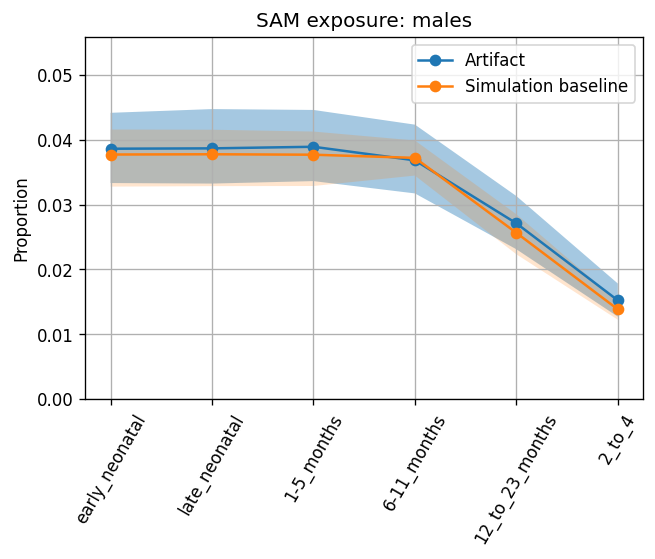

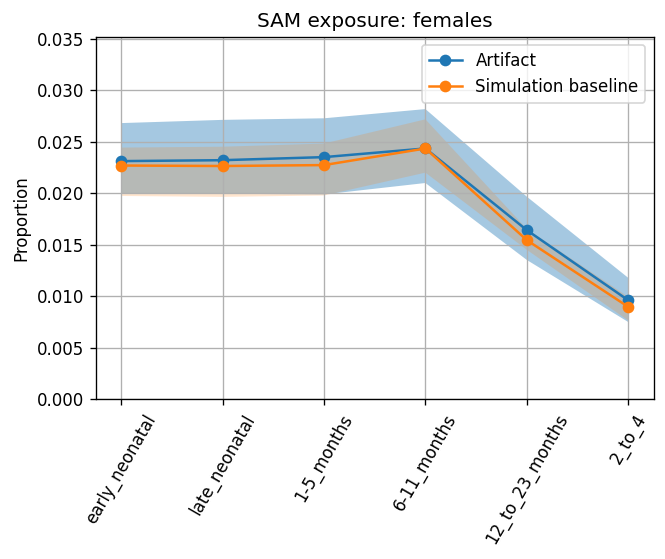

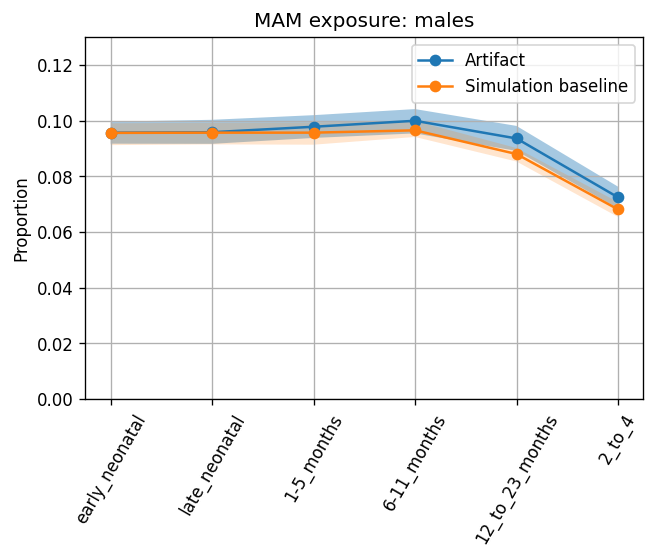

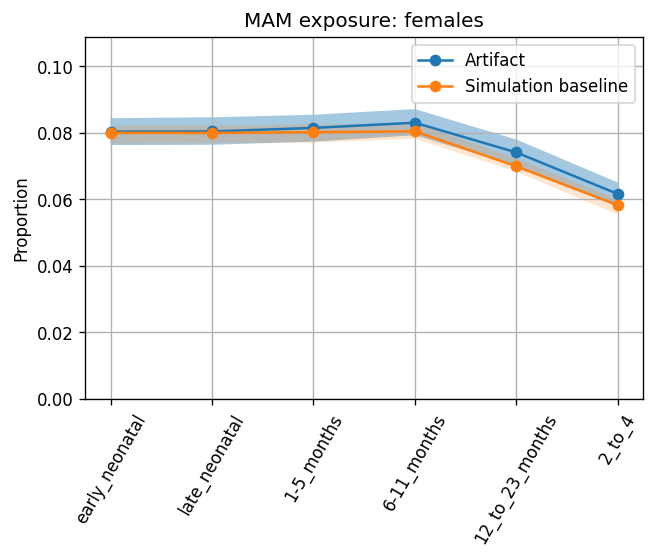

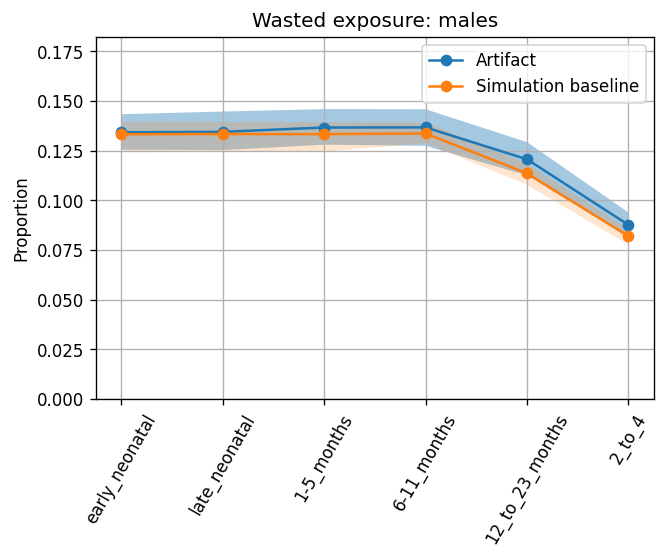

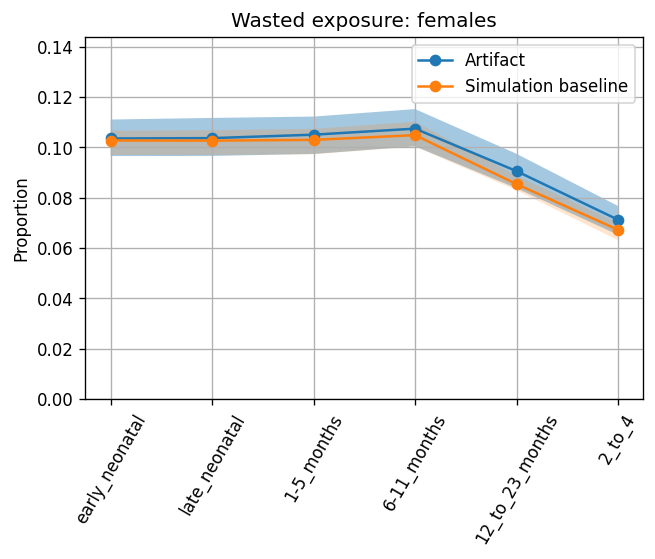

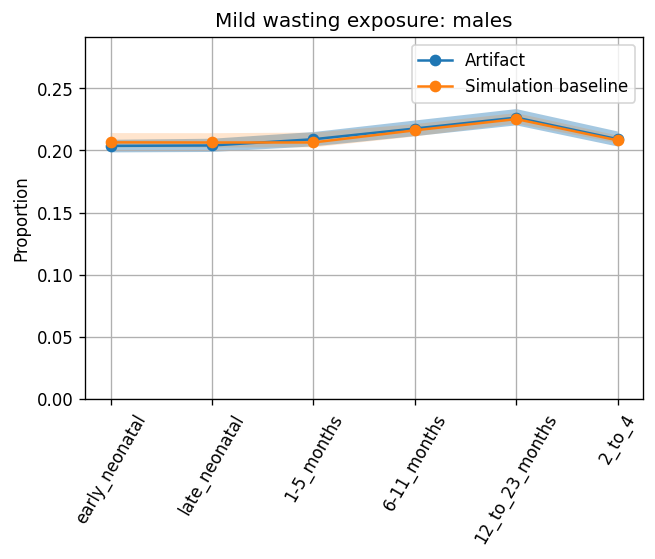

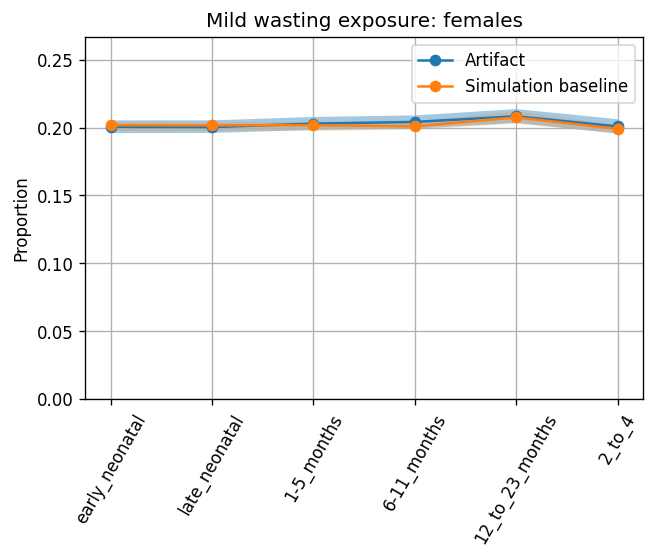

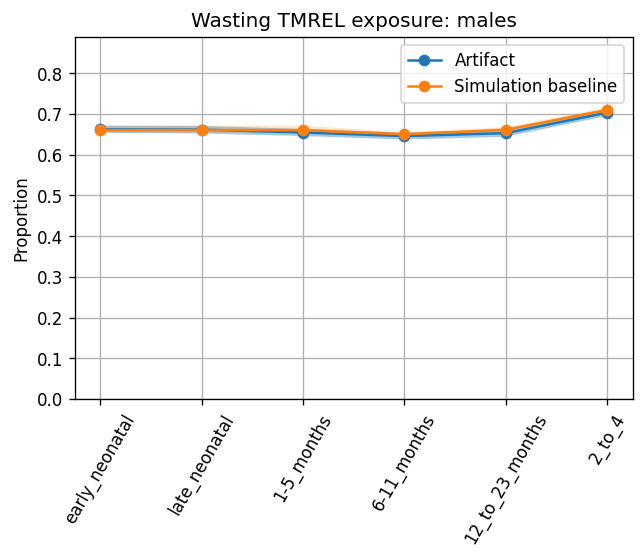

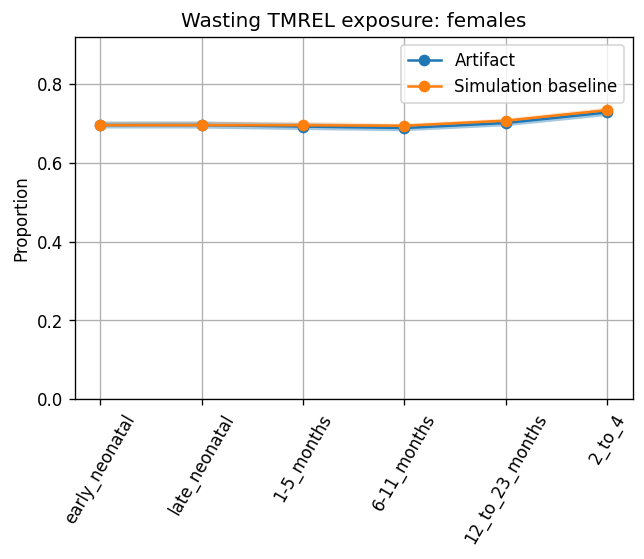

In [25]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    #for i in list(range(0,len(art_cats))):
    #    for sex in ['male','female']:
    #        plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
    #                          art_cats[i], s_sim_cats[i], s_title_cats[i])
    #        pdf.savefig(bbox_inches='tight')

# Cause parameters

In [26]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [63]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass
artifact_data = artifact_data.sort_values(by='age_group')
artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.0,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
42,male,0.0,0.019178,2020,2021,84.948473,83.078773,86.972406,early_neonatal,1,remission_rate,diarrheal_diseases
48,female,0.0,0.019178,2020,2021,0.008350,0.004183,0.016337,early_neonatal,1,cause_specific_mortality_rate,diarrheal_diseases
54,male,0.0,0.019178,2020,2021,0.010762,0.005863,0.018621,early_neonatal,1,cause_specific_mortality_rate,diarrheal_diseases
192,female,0.0,0.019178,2020,2021,0.000000,0.000000,0.000000,early_neonatal,1,excess_mortality_rate,measles


In [42]:
# load GBD cause data
cause_ids = [302,341,322,294]
age_group_ids = [2,3,4,5]
sex_ids = [1,2]
location_id = 179

In [43]:
from db_queries import get_outputs

In [44]:
gbd_data = get_outputs(gbd_round_id=6,
                    topic='cause',
                       cause_id=cause_ids,
                       location_id=location_id,
                       sex_id=sex_ids,
                       age_group_id=age_group_ids,
                       year_id=2019,
                       measure_id=[1,5,6],
                       metric_id=3,
                      decomp_step='step5')
gbd_data

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower
0,2,294,179,1,3,1,2019,_all,Early Neonatal,All causes,False,Ethiopia,admin0,Deaths,Rate,Male,1.288269,1.676748,1.000185
1,2,294,179,1,3,2,2019,_all,Early Neonatal,All causes,False,Ethiopia,admin0,Deaths,Rate,Female,0.869707,1.093357,0.700294
2,2,294,179,5,3,1,2019,_all,Early Neonatal,All causes,False,Ethiopia,admin0,Prevalence,Rate,Male,0.738181,0.765298,0.709896
3,2,294,179,5,3,2,2019,_all,Early Neonatal,All causes,False,Ethiopia,admin0,Prevalence,Rate,Female,0.835229,0.852841,0.818724
4,2,294,179,6,3,1,2019,_all,Early Neonatal,All causes,False,Ethiopia,admin0,Incidence,Rate,Male,9.876906,11.179080,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5,341,179,1,3,2,2019,measles,1 to 4,Measles,False,Ethiopia,admin0,Deaths,Rate,Female,0.000124,0.000302,0.000038
92,5,341,179,5,3,1,2019,measles,1 to 4,Measles,False,Ethiopia,admin0,Prevalence,Rate,Male,0.000302,0.000719,0.000098
93,5,341,179,5,3,2,2019,measles,1 to 4,Measles,False,Ethiopia,admin0,Prevalence,Rate,Female,0.000309,0.000737,0.000100
94,5,341,179,6,3,1,2019,measles,1 to 4,Measles,False,Ethiopia,admin0,Incidence,Rate,Male,0.011017,0.026253,0.003572


In [31]:
groupby_cols = ['input_draw','sex','age']

In [32]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,1.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,0.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,0.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,0.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,2.0,susceptible_to_child_wasting,late_neonatal


In [33]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [34]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [35]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [36]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [37]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

In [45]:
gbd_data['sex'] = gbd_data.sex.str.lower()
gbd_data['cause'] = gbd_data.cause_name.str.lower().str.replace(' ','_')
gbd_data['measure'] = np.where(gbd_data.measure_name == 'Deaths', 'cause_specific_mortality_rate',
                              np.where(gbd_data.measure_name == 'Incidence', 'incidence_rate',
                                      'prevalence'))
gbd_data['age'] = np.where(gbd_data.age_group_id.isin([2,3]), gbd_data.age_group_name.str.lower().str.replace(' ','_'),
                          np.where(gbd_data.age_group_id==4, '1-5_months', '12_to_23_months'))
gbd_data_4 = gbd_data.loc[gbd_data.age_group_id==4]
gbd_data_4['age'] = '6-11_months'
gbd_data_4['age_group_id'] = 4.5
gbd_data_5 = gbd_data.loc[gbd_data.age_group_id==5]
gbd_data_5['age'] = '2_to_4'
gbd_data_5['age_group_id'] = 5.5
gbd_data = pd.concat([gbd_data,gbd_data_4,gbd_data_5]).sort_values(by='age_group_id')
gbd_data.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,...,location_type,measure_name,metric_name,sex,val,upper,lower,cause,measure,age
0,2.0,294,179,1,3,1,2019,_all,Early Neonatal,All causes,...,admin0,Deaths,Rate,male,1.288269,1.676748,1.000185,all_causes,cause_specific_mortality_rate,early_neonatal
23,2.0,341,179,6,3,2,2019,measles,Early Neonatal,Measles,...,admin0,Incidence,Rate,female,0.000000,0.000000,0.000000,measles,incidence_rate,early_neonatal
22,2.0,341,179,6,3,1,2019,measles,Early Neonatal,Measles,...,admin0,Incidence,Rate,male,0.000000,0.000000,0.000000,measles,incidence_rate,early_neonatal
21,2.0,341,179,5,3,2,2019,measles,Early Neonatal,Measles,...,admin0,Prevalence,Rate,female,0.000000,0.000000,0.000000,measles,prevalence,early_neonatal
20,2.0,341,179,5,3,1,2019,measles,Early Neonatal,Measles,...,admin0,Prevalence,Rate,male,0.000000,0.000000,0.000000,measles,prevalence,early_neonatal


In [46]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    g = gbd_data.loc[(gbd_data.sex==sex)
                    &(gbd_data.cause==cause)
                    &(gbd_data.measure==measure)]
    plt.plot(g['age'], g['val'], marker='o', label='GBD data')
    plt.fill_between(g['age'], g['lower'], g['upper'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-46-443be5fcb9a6>:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(g['age'], g['val'], marker='o', label='GBD data')
<ipython-input-46-443be5fcb9a6>:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.fill_between(g['age'], g['lower'], g['upper'], alpha=0.2)
<ipython-input-46-443be5fcb9a6>:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(g['age'], g['val'], marker='o', label='GBD data')
<ipython-input-46-443be5fcb9a6>:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecate

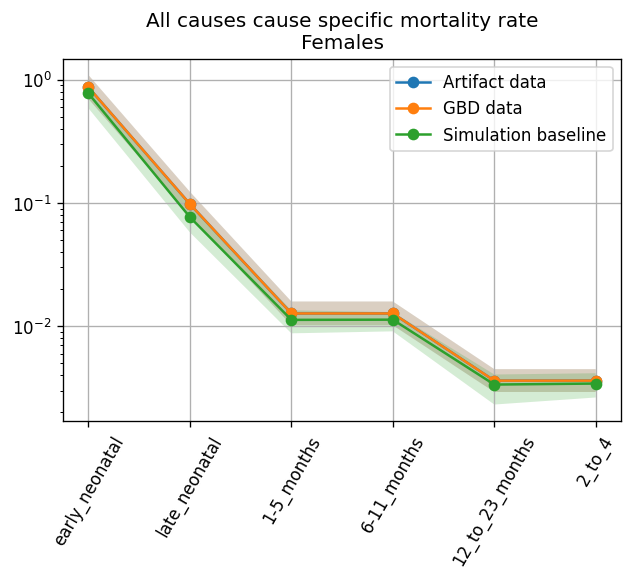

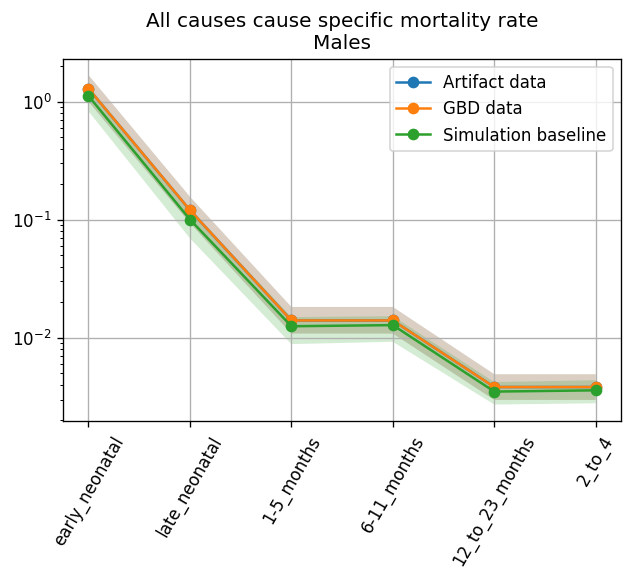

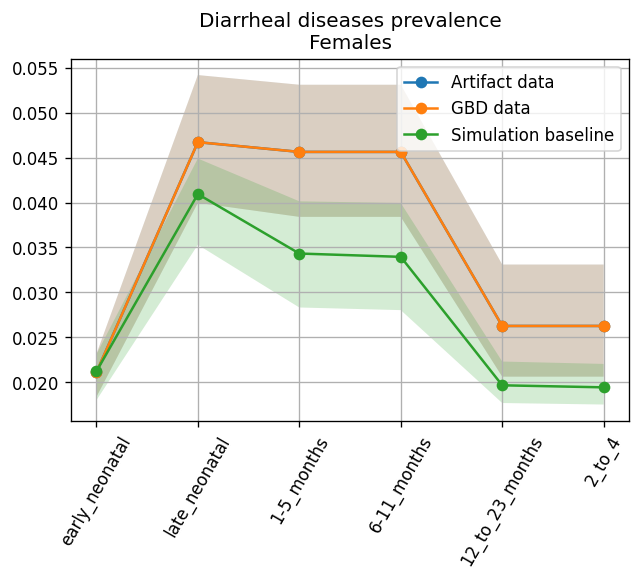

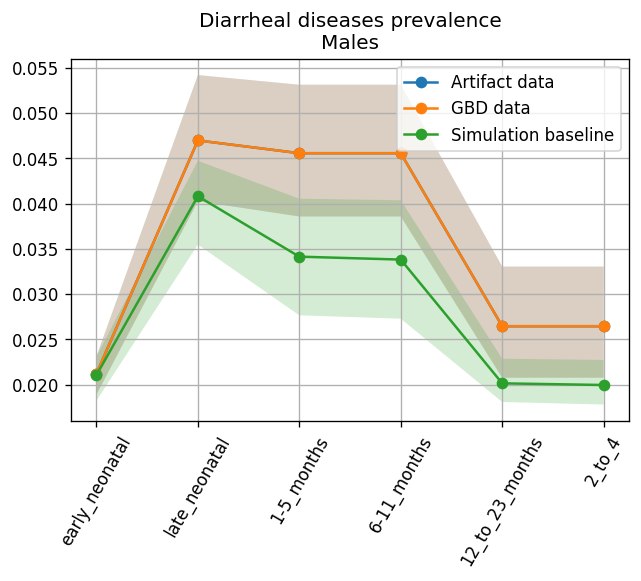

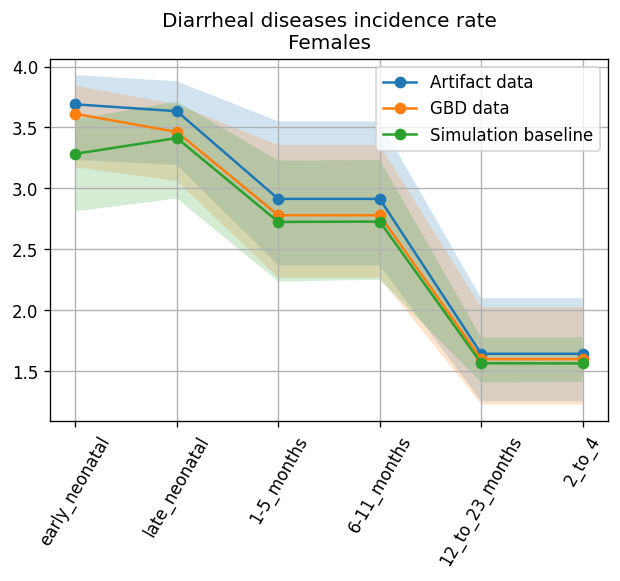

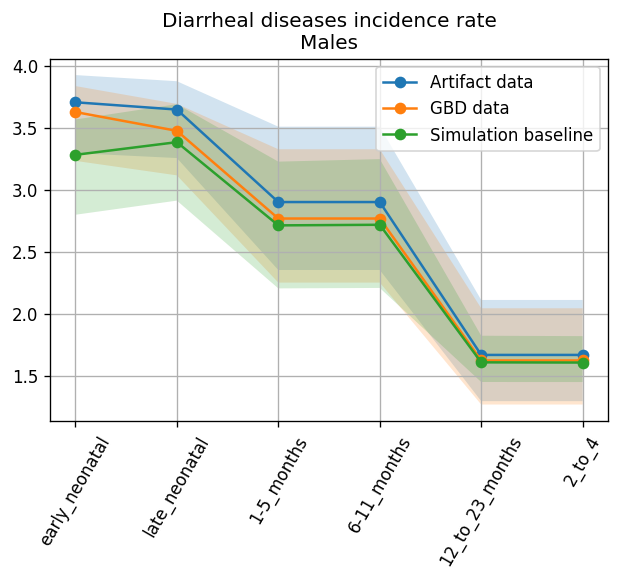

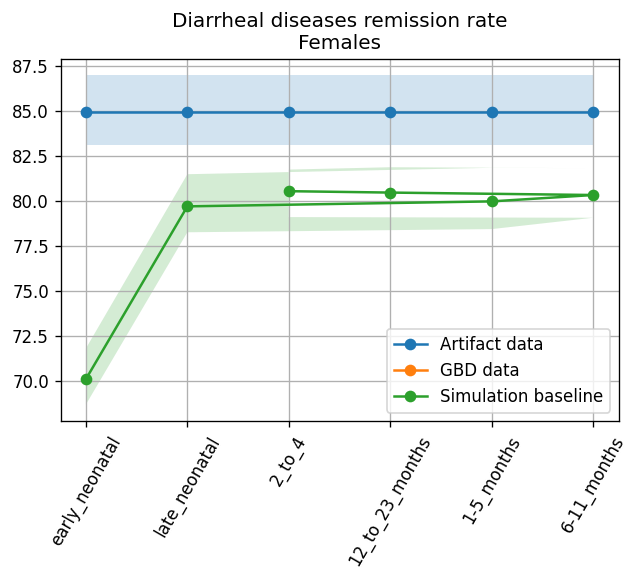

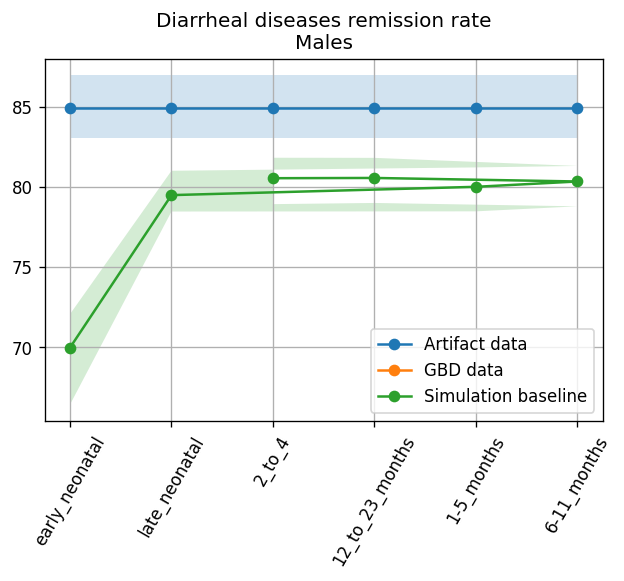

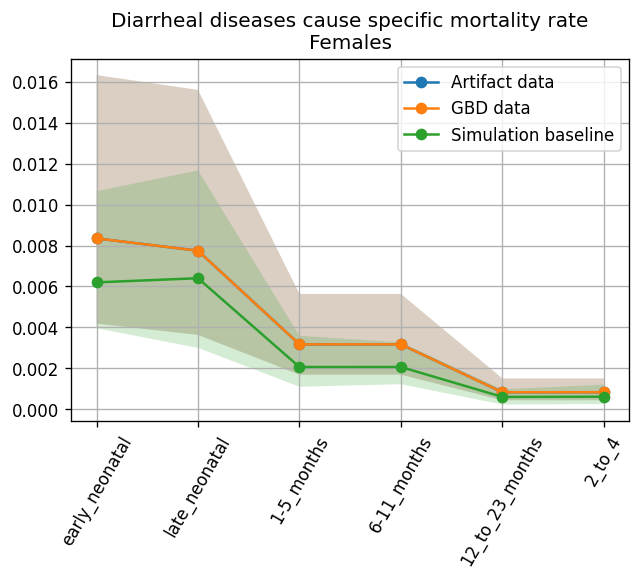

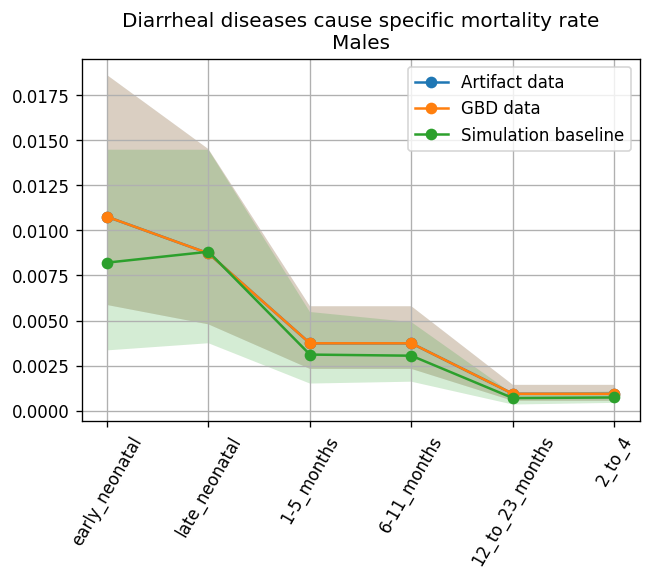

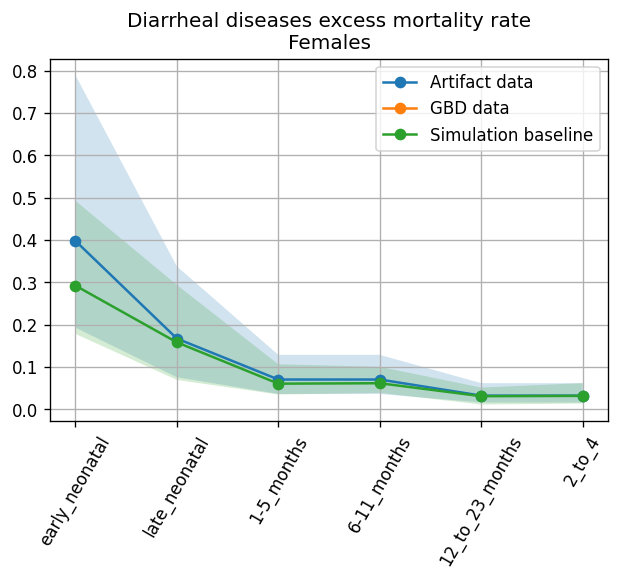

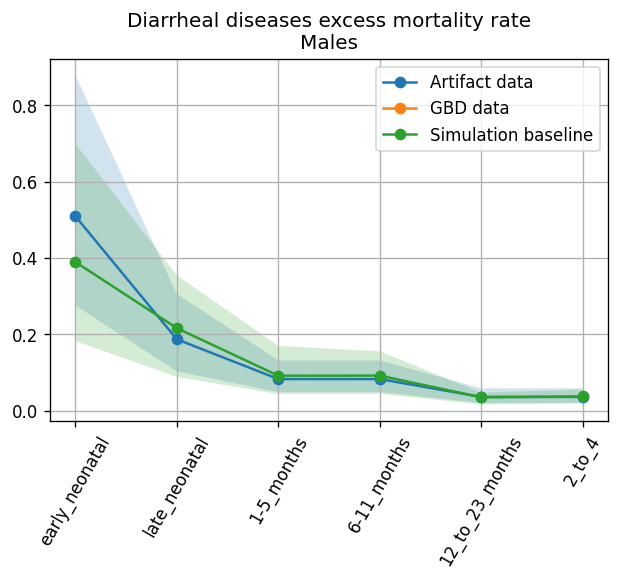

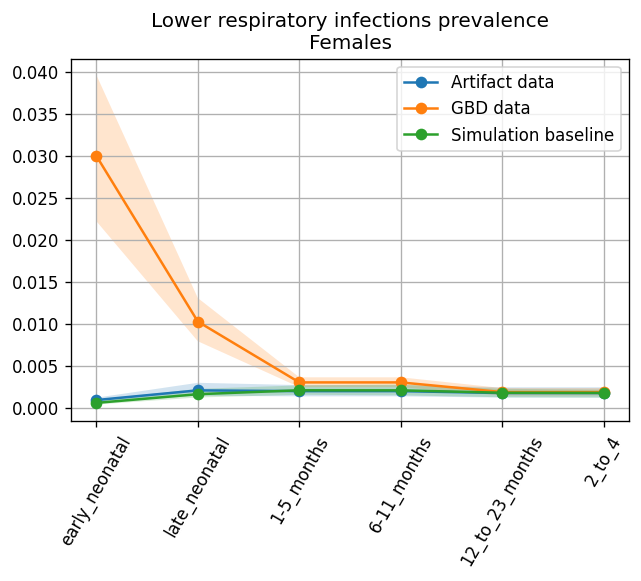

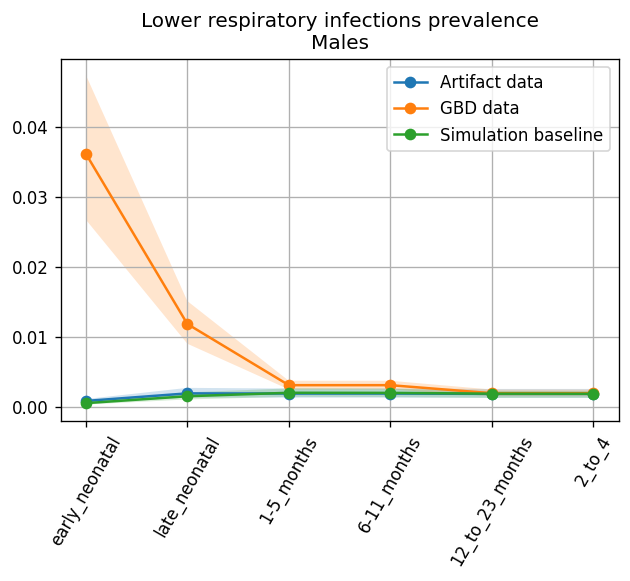

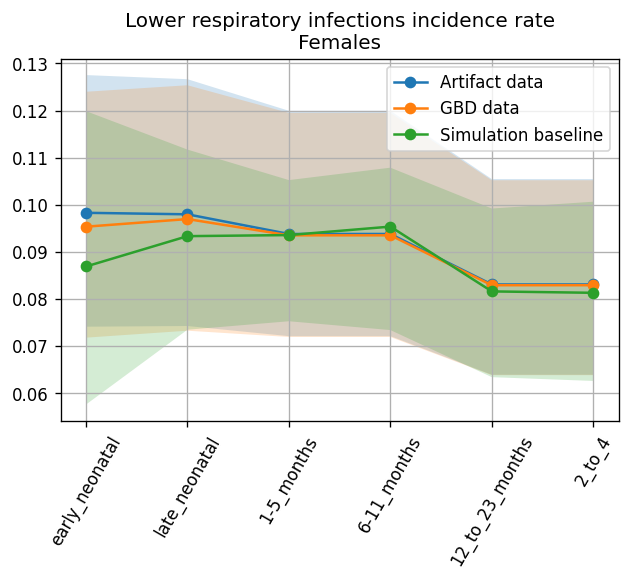

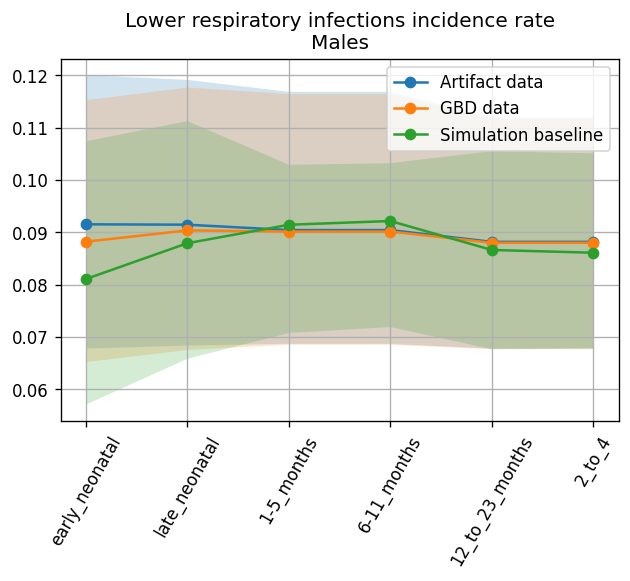

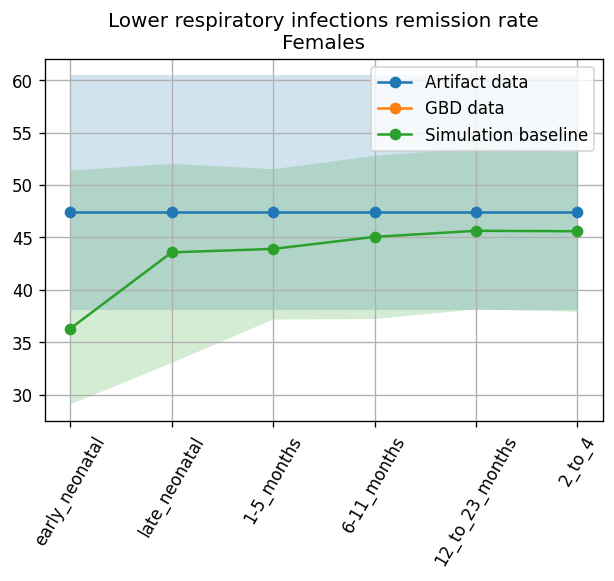

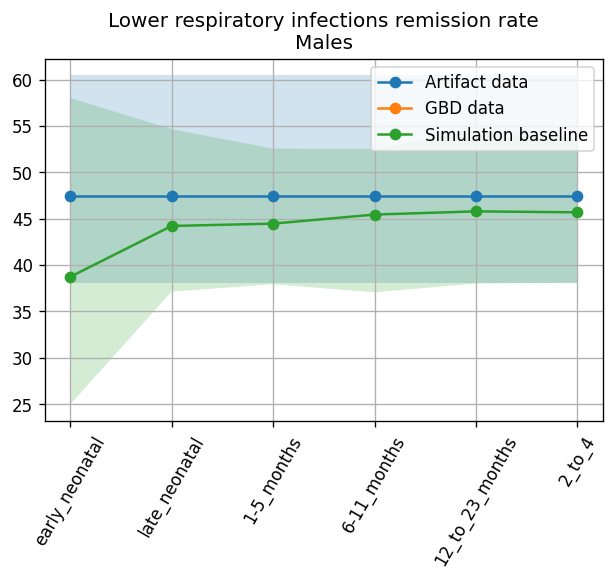

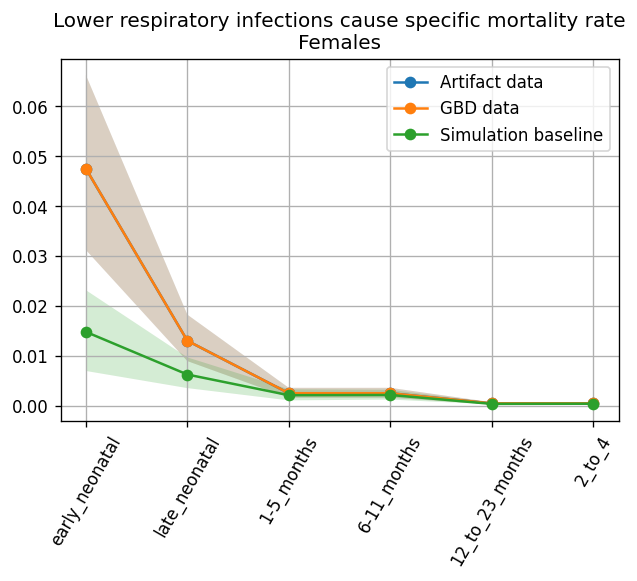

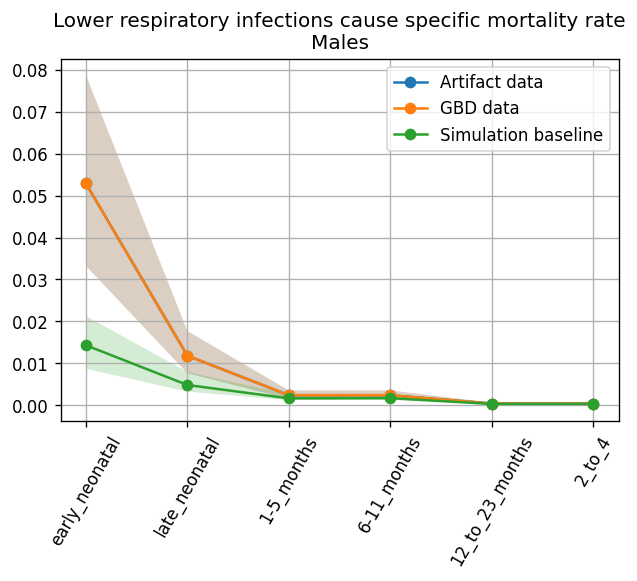

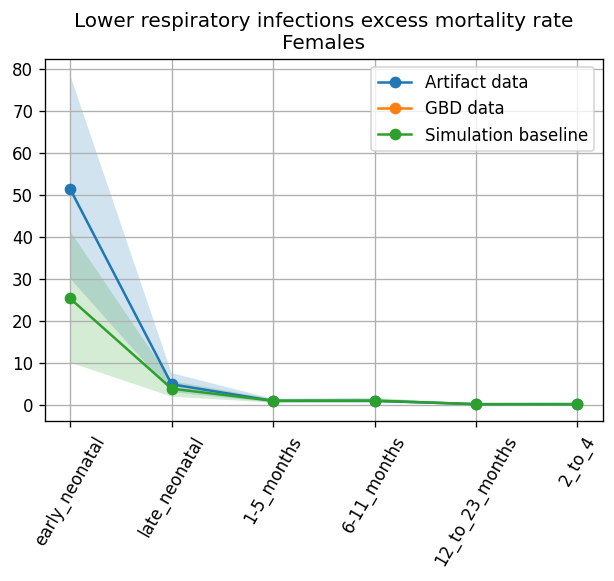

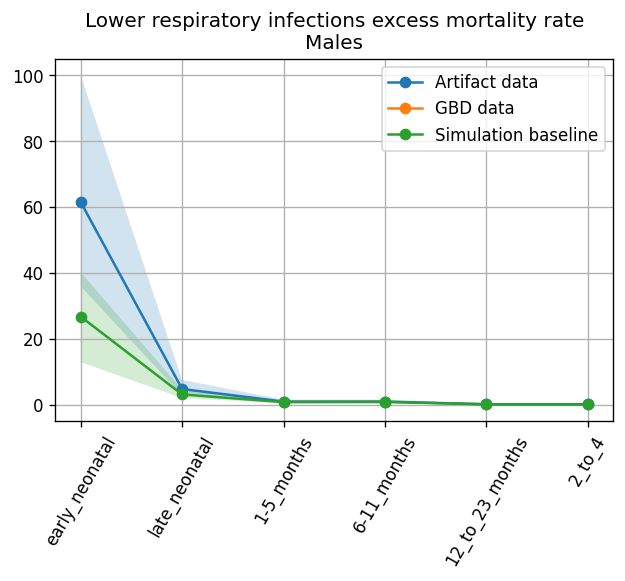

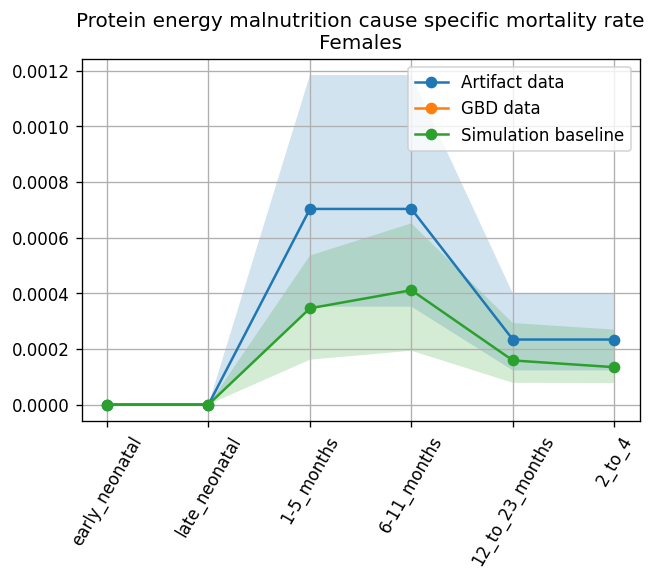

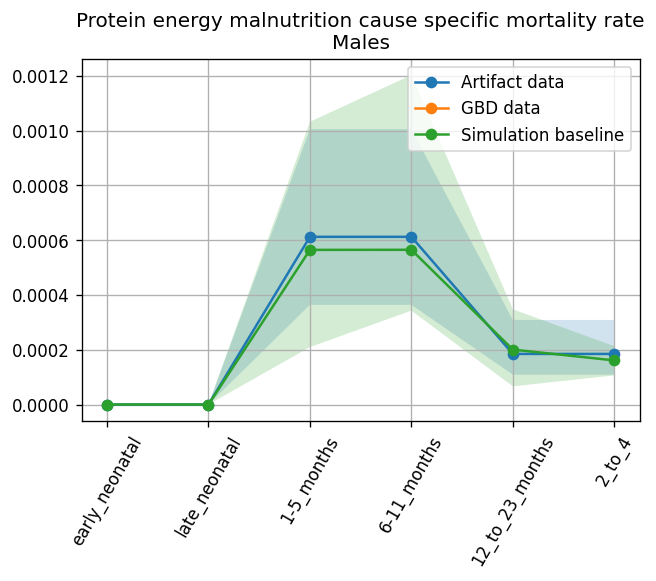

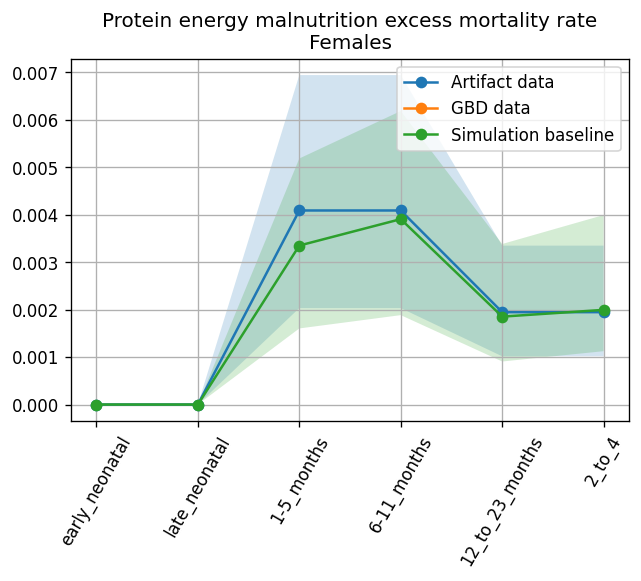

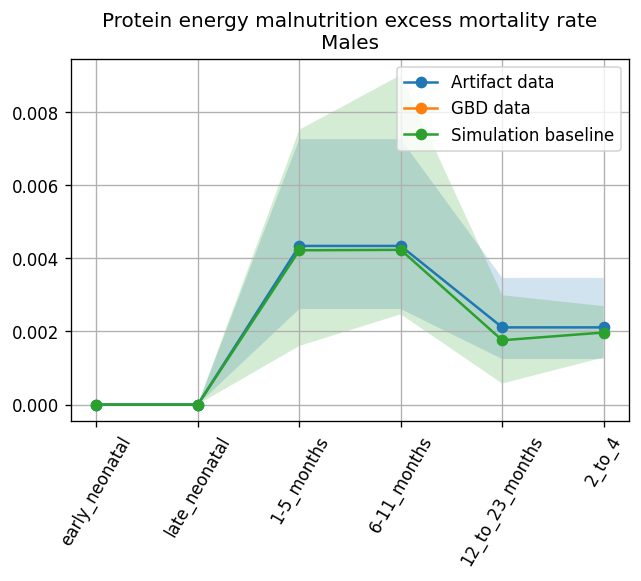

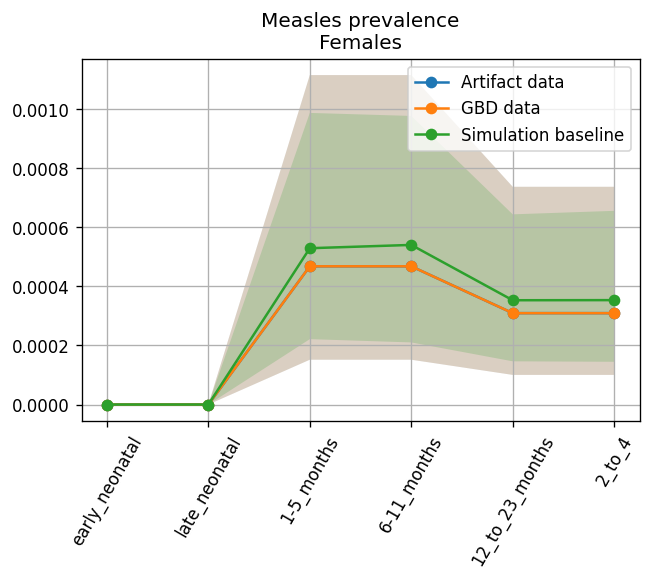

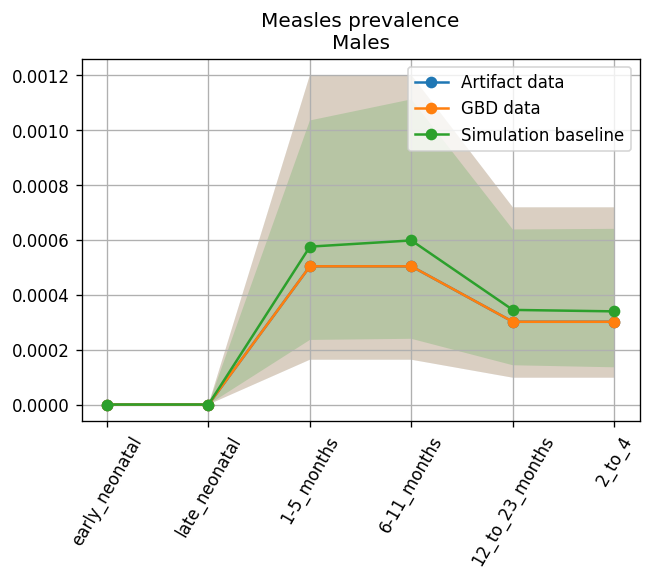

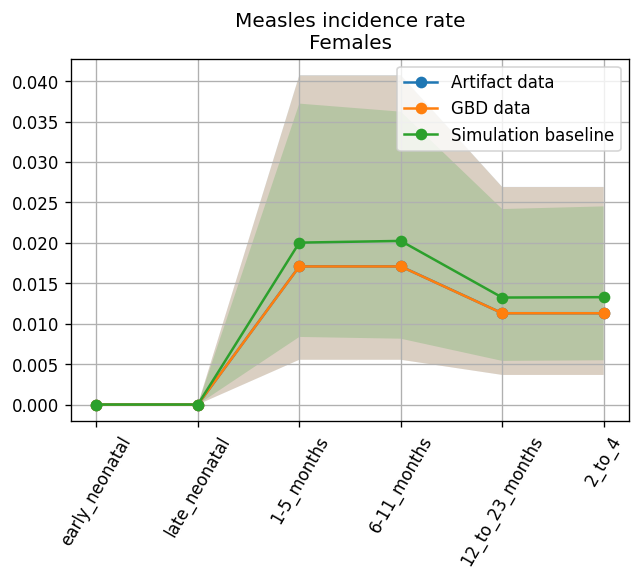

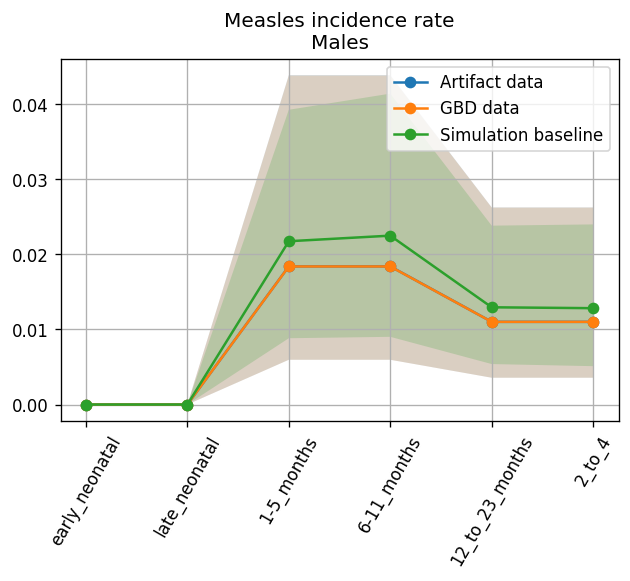

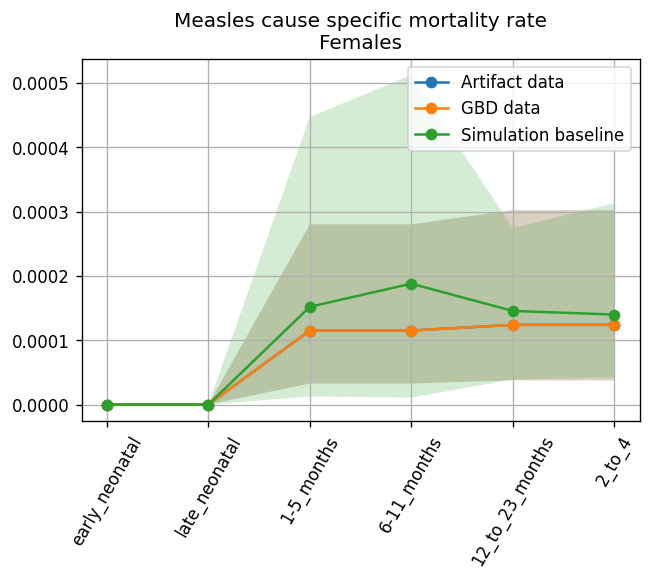

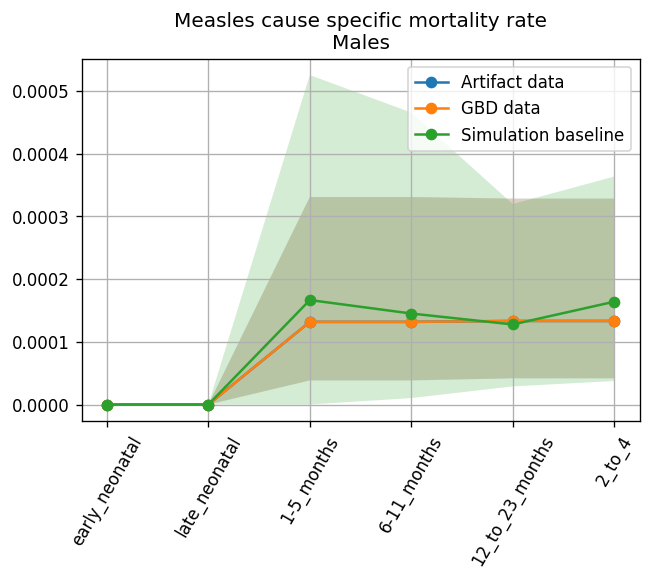

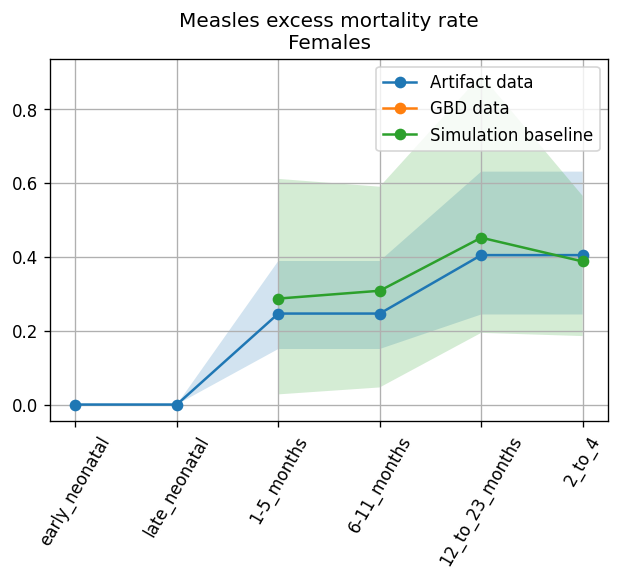

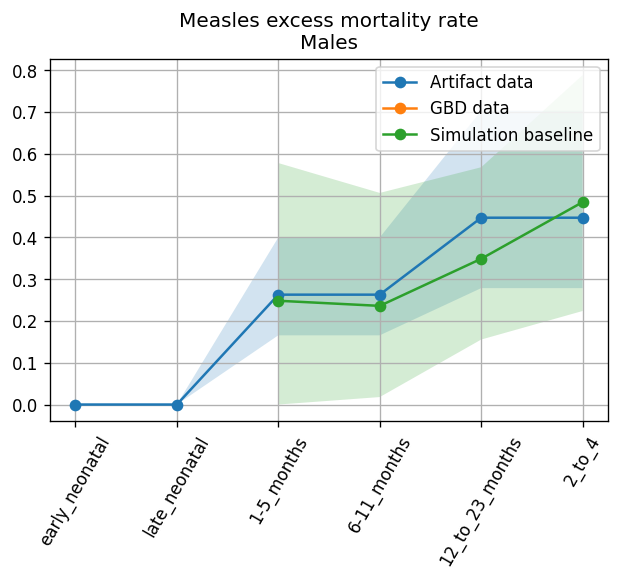

In [48]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass